## Support Vector Machines (SVM)
<ul>
<li> Supervised learning algo
<li> SVMs are used for both classification and regression although it is more suited to the former 
<li> SVM algo finds the optimal hyperplane in an N (depends on the features/attributes being considered while studying the data) dimensional space such that it can classify or separate data point of different categories
<li> When choosing the hyperplane we take care to keep the data points of different categories separated as mech as possible
<li> How and why of SVM's working? We choose a hyperplane which is as far as possible from any close points (basically, JEE time optimization problem-ish thing. Maximize the distance from any points on either "side" of the hyperplane) and basically divide the whole space into 2 regions
<li> SVMs are in a way binary classifiers, as in they can only directly classify the space into xyz-type points and non xyz-type points but we can extend this to multi class classification if we were to apply it on every pair of classes ( meaning a total of n*(n-1)/2 models trained)
</ul>

# Maths behind SVM
representation of hyper plane $w^Tx+b=0$ where wis the normal vector to the hyperplane and b is the distance from origin (normal representation)
<br>
distance between a point and the hyperplane will be given by $d_i=\frac{w^Tx_i+b}{||w||}$

depending on the sign of the quantity we get on substitution pf the point in the equation, we can classify the points into separate types of points (for linear SVM).
<br>
There are two types of SVM- hard margin which wants to classify data perfectly which makes it very sensitive to outliers and usually causes a higher training error and the other is soft margin svm which allows for a slim margin of misclassification which allows for better generalization
<br>
I will not write the equations for both here, it's not because they are very easy or very difficult. I am just too lazy to want to format them it 

In [1]:
#I am making a classifier on the breast cancer data of sklearn
#imports
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer,make_blobs,make_moons,make_circles
from sklearn.metrics import mean_squared_error,accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC #this is a genius thing, I love it
import numpy as np
import random

In [2]:
class SVMSoft:
    def __init__(self,alpha=0.001,lambdaS=0.01,n=1000):
        self.alpha=alpha
        self.lambdaS=lambdaS
        self.n=n
        self.b=None
        self.w=None

    def predict(self,x):
        pred=np.dot(x,self.w)-self.b
        prediction=[1 if res>0 else -1 for res in pred]
        return prediction
    
    def findBW(self,x,y):#main step of training
        samples,attr=x.shape
        self.w=np.zeros(attr)
        self.b=0
        for _ in range(self.n):
            for i,xi in enumerate(x):
                if y[i]*(np.dot(xi,self.w)-self.b)>=1:
                    self.w-=self.alpha*(2*self.w*self.lambdaS)
                else:
                    self.w -= self.alpha * (2 * self.lambdaS * self.w - np.dot(xi, y[i]))
                    self.b-=self.alpha*y[i]
        return self.w,self.b
    
    def hyperplane(w,x,b,offset):
        return (-w[0]*x+b+offset)/w[1]
    
    def plotSVM(x,y,w,b):
        plot=plt.figure()
        ax=plot.add_subplot(1,1,1)
        plt.scatter(x[:,0],x[:,1],marker='o',c=y)
        
        a=np.amax(x[:,0])
        wap=SVMSoft.hyperplane(w,a,b,0)
        wan=SVMSoft.hyperplane(w,a,b,-1)
        wao=SVMSoft.hyperplane(w,a,b,1)

        q=np.amin(x[:,0])
        wqp=SVMSoft.hyperplane(w,q,b,0)
        wqn=SVMSoft.hyperplane(w,q,b,-1)
        wqo=SVMSoft.hyperplane(w,q,b,1)

        ax.plot([q,a],[wqp,wap],'y--')
        ax.plot([q,a],[wqn,wan],'k')
        ax.plot([q,a],[wqo,wao],'k')

        xmin=np.amin(x[:,1])
        xmax=np.amax(x[:,1])
        ax.set_ylim([xmin-3,xmax+3])
        plt.title("Plot")
        plt.show()



x1 : 
 [[2.51526543 1.11143935]
 [1.8155981  1.11969719]
 [2.69637316 0.62563218]
 [1.67280531 0.65930057]
 [1.89593761 5.18540259]]  
 y1 :
 [ 1  1  1  1 -1]

x2 : 
 [[-0.77956533  0.71027912]
 [ 1.43825296 -0.41011369]
 [ 0.48535274  0.88891787]
 [ 0.73813568 -0.51461139]
 [ 0.18912344 -0.07164254]]  
 y2 :
 [0 1 0 1 1]


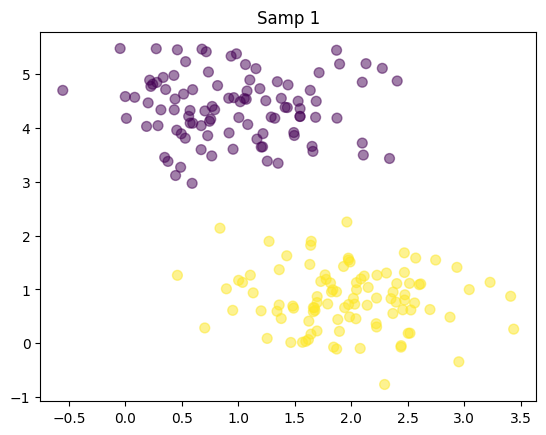

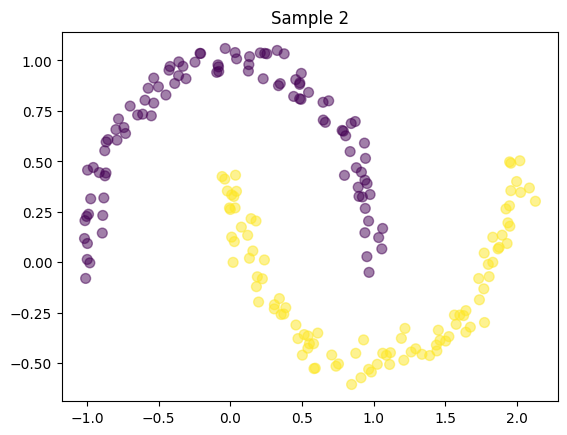

In [8]:
x1, y1 = make_blobs(n_samples=200, centers=2,random_state=0, cluster_std=0.60) #points
y1 = np.where(y1 <= 0, -1, 1) #target yes or no in real life data sets
x2,y2=make_moons(n_samples=200, noise=.05)

print("\nx1 : \n",x1[:5], " \n y1 :\n",y1[:5])
print("\nx2 : \n",x2[:5], " \n y2 :\n",y2[:5])

plt.scatter(x1[:, 0], x1[:, 1], c=y1, s=50, alpha=.5)
plt.title("Samp 1")
plt.show()

plt.scatter(x2[:, 0], x2[:, 1], c=y2, s=50, alpha=.5)
plt.title("Sample 2")
plt.show()


For dataset 1, score: 1.0


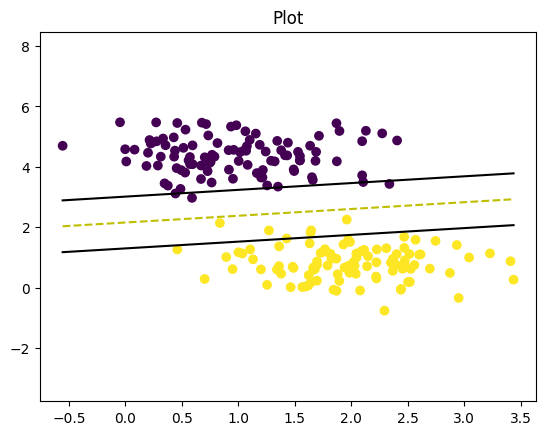

In [9]:
svm1 = SVMSoft()
w1,b1 = svm1.findBW(x1,y1)
print("For dataset 1, score:" ,accuracy_score(svm1.predict(x1),y1))
SVMSoft.plotSVM(x1, y1, w1, b1)

# svm1 = SVMSoft()
# w2,b2 = svm1.findBW(x2,y2)
# print("For dataset 2, score:" ,accuracy_score(svm1.predict(x2),y2))
# SVMSoft.plotSVM(x2, y2, w2, b2)

For dataset 2, score: 0.5


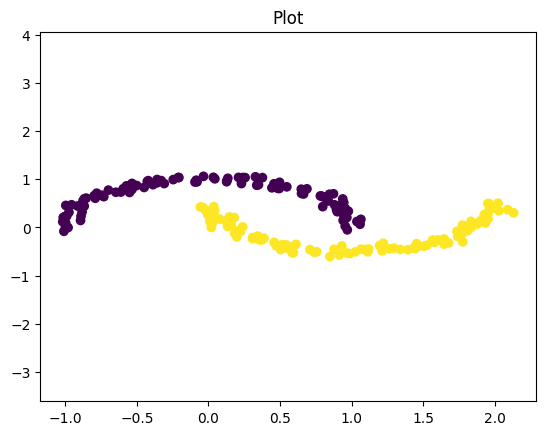

In [10]:
svm1 = SVMSoft()
w2,b2 = svm1.findBW(x2,y2)
print("For dataset 2, score:" ,accuracy_score(svm1.predict(x2),y2))
SVMSoft.plotSVM(x2, y2, w2, b2)